<a href="https://colab.research.google.com/github/rayaschein/rayadata110/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


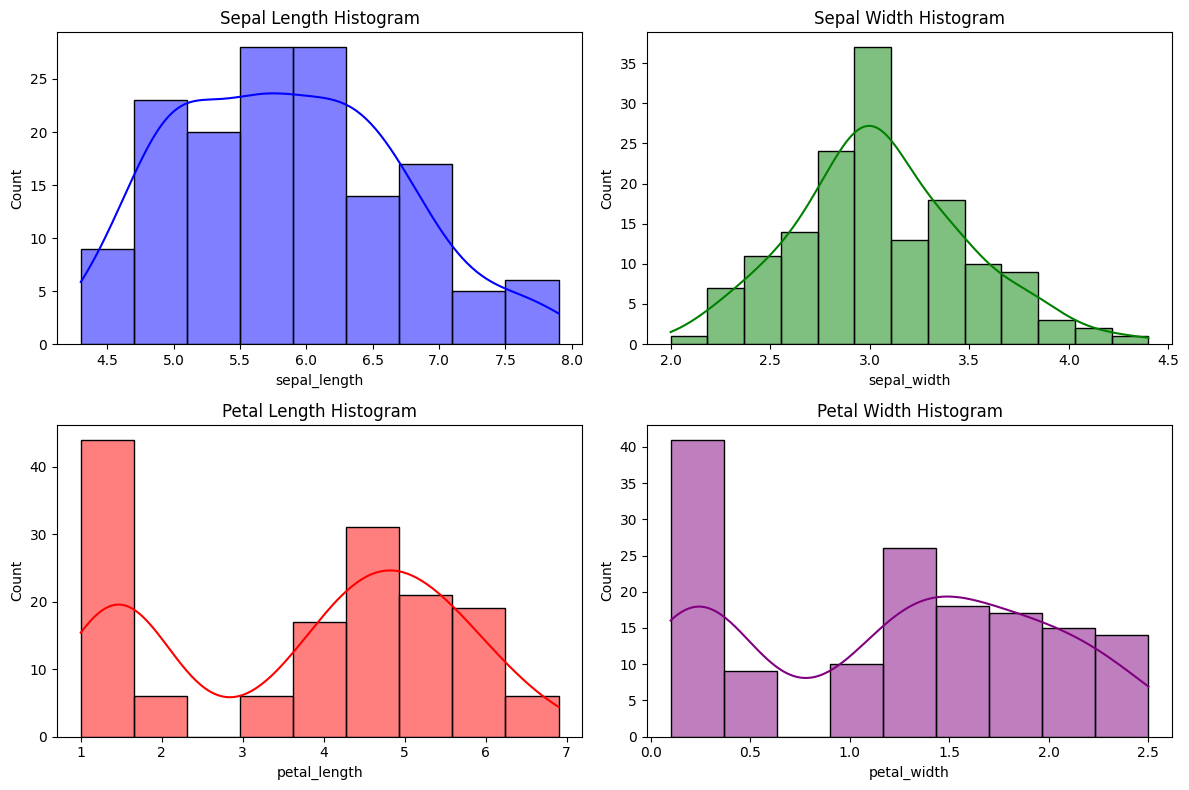

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(iris['sepal_length'], kde=True, color='blue')
plt.title('Sepal Length Histogram')

plt.subplot(2, 2, 2)
sns.histplot(iris['sepal_width'], kde=True, color='green')
plt.title('Sepal Width Histogram')

plt.subplot(2, 2, 3)
sns.histplot(iris['petal_length'], kde=True, color='red')
plt.title('Petal Length Histogram')

plt.subplot(2, 2, 4)
sns.histplot(iris['petal_width'], kde=True, color='purple')
plt.title('Petal Width Histogram')

plt.tight_layout()
plt.show()

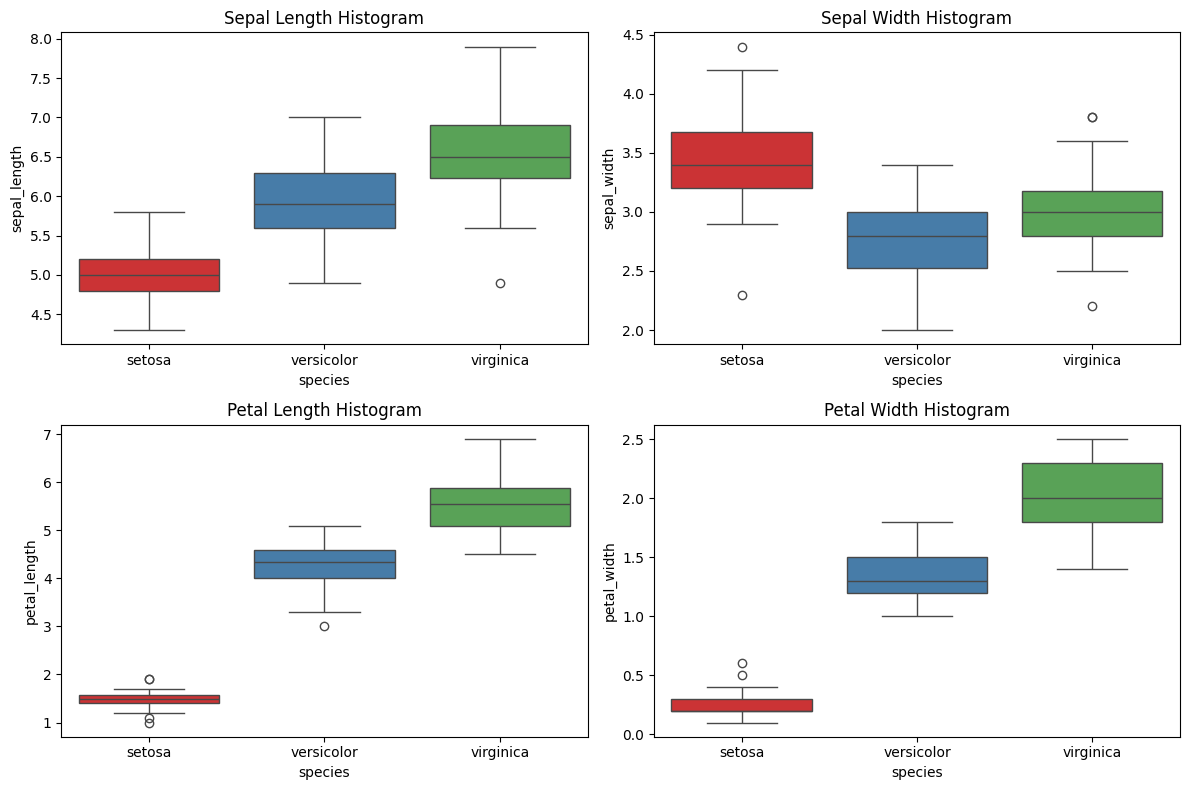

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=iris, hue='species', palette='Set1')
plt.title('Sepal Length Histogram')

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=iris, hue='species', palette='Set1')
plt.title('Sepal Width Histogram')

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=iris, hue='species', palette='Set1')
plt.title('Petal Length Histogram')

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=iris, hue='species', palette='Set1')
plt.title('Petal Width Histogram')

plt.tight_layout()
plt.show()

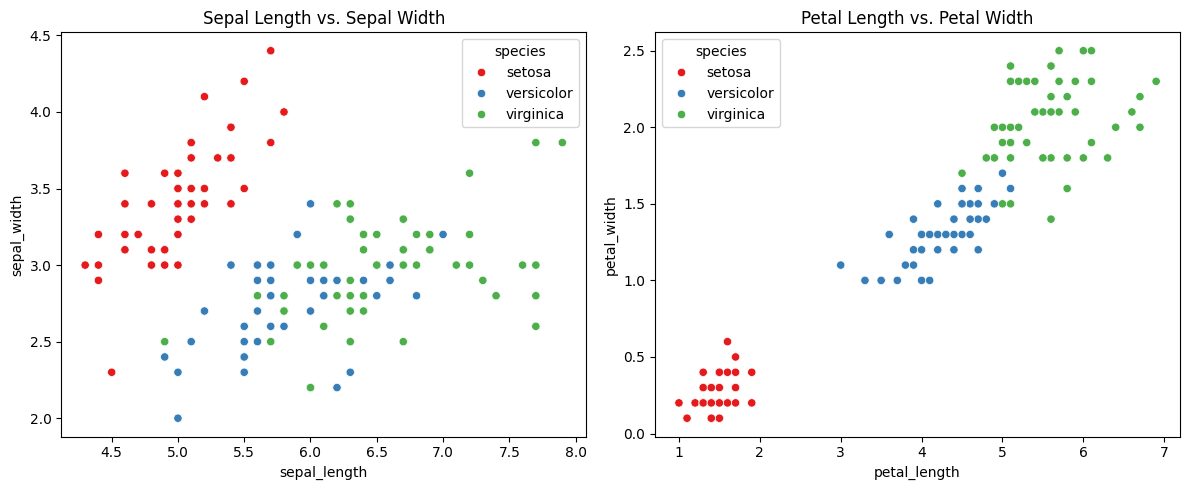

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris, hue='species', palette='Set1')
plt.title('Sepal Length vs. Sepal Width')

plt.subplot(1, 2, 2)
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species', palette='Set1')
plt.title('Petal Length vs. Petal Width')

plt.tight_layout()
plt.show()

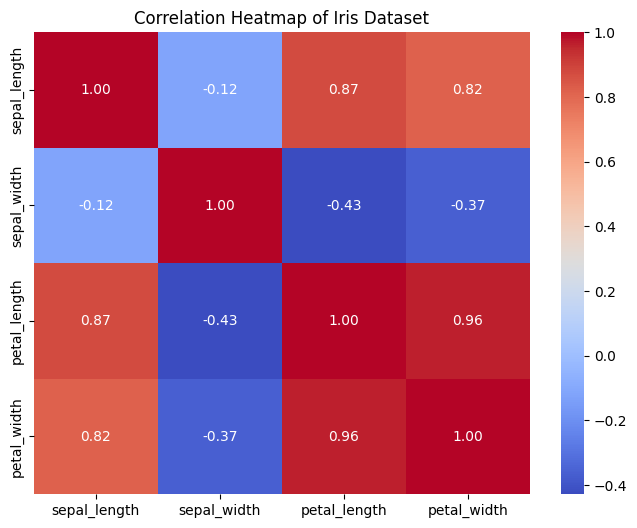

In [17]:
numbers = iris.drop(columns='species')
correlation = numbers.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

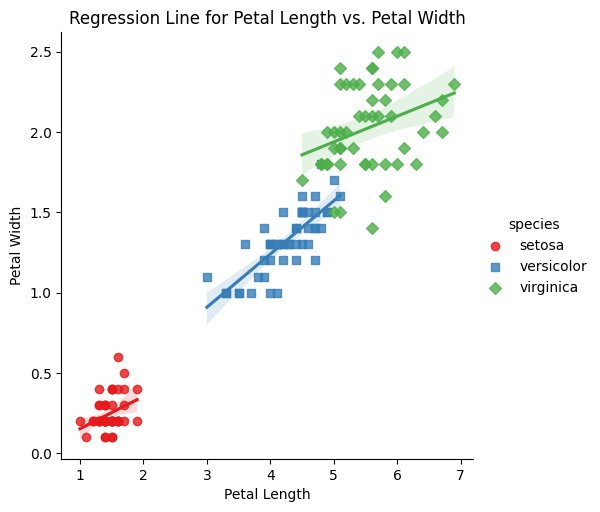

In [19]:
sns.lmplot(x='petal_length', y='petal_width', data=iris, hue='species', palette='Set1', markers=['o', 's', 'D'])
plt.title('Regression Line for Petal Length vs. Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

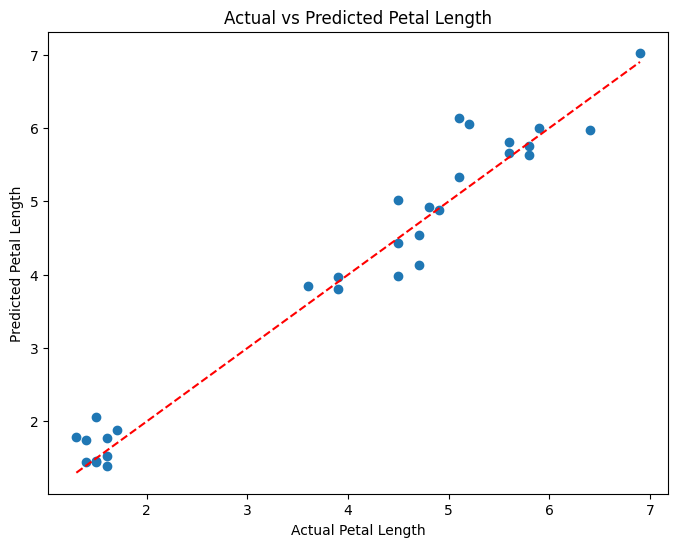

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = iris[['sepal_length', 'sepal_width', 'petal_width']]
y = iris['petal_length']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Petal Length')
plt.ylabel('Predicted Petal Length')
plt.title('Actual vs Predicted Petal Length')
plt.show()

In [22]:
print("Coefficients:")
for feature, coefficient in zip(X.columns, model.coef_):
    print(f"{feature}: {coefficient}")
print(f"Intercept: {model.intercept_}")

Coefficients:
sepal_length: 0.7228146259066672
sepal_width: -0.6358164939643192
petal_width: 1.4675240315042084
Intercept: -0.2621959025887035


In [23]:
equation = f"Petal Length = {model.intercept_:.2f} "
for feature, coefficient in zip(X.columns, model.coef_):
    equation += f" + {coefficient:.2f} * {feature}"
print("Regression Equation:")
print(equation)

Regression Equation:
Petal Length = -0.26  + 0.72 * sepal_length + -0.64 * sepal_width + 1.47 * petal_width
